<a href="https://colab.research.google.com/github/AngelTroncoso/Agentes_Gratis/blob/main/integracion_de_cadena_runnable_y_outputparser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

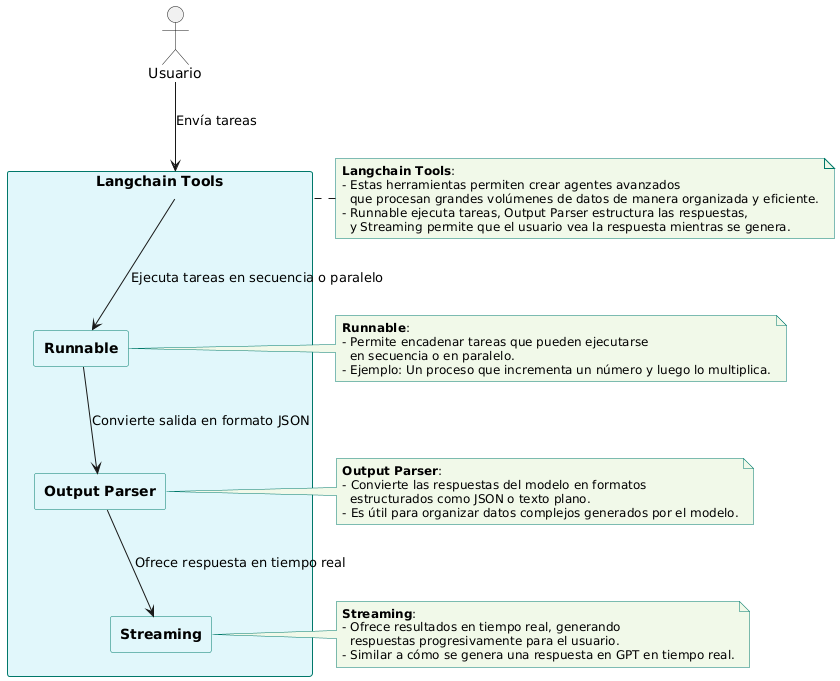

Runnable:  
Ejecuta tareas de manera secuencial o en paralelo.  
Permite organizar el flujo de trabajo de procesos conectados que se invocan uno tras otro o en paralelo para mejorar la eficiencia.  
Ejemplo: Sumar 1 a un valor y luego multiplicar por 2, pasando el resultado de una tarea a la siguiente.  
Output Parser:  
Convierte las respuestas del modelo en datos estructurados, como JSON o texto organizado, lo que es útil para obtener datos claros y procesables.
Facilita la interpretación y almacenamiento de los resultados generados por el modelo.  
Streaming:  
Permite ver las respuestas de manera progresiva en tiempo real.
Ideal para reducir la espera del usuario y mejorar la experiencia interactiva, como ocurre en los sistemas de generación de texto en tiempo real como GPT.  
Langchain Tools:  
Integra las tres herramientas clave (Runnable, Output Parser y Streaming) para construir agentes más eficientes y escalables que puedan procesar grandes volúmenes de datos y generar respuestas rápidas y estructuradas.

# Integración de Cadenas en Proyectos : Runnable, OutputParser y Streaming

In [ ]:
!pip install langchain

In [ ]:
from langchain_core.runnables import RunnableLambda

sequence = RunnableLambda(lambda x: x +1 ) | RunnableLambda(lambda x: x * 2 )

In [ ]:
sequence.invoke(10)

In [ ]:
sequence = RunnableLambda(lambda x: x +1 ) | {
    'index_1' : RunnableLambda(lambda x: x * 2 ),
    'index_2' : RunnableLambda(lambda x: x * 5 )
}

In [ ]:
sequence.invoke(10)

In [ ]:
!pip install -qU langchain langchain_openai

In [ ]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [ ]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [ ]:
model = ChatOpenAI()

In [ ]:
joke_query = 'Tell me a joke'

In [ ]:
parser = JsonOutputParser()

In [ ]:
prompt = PromptTemplate(
    template = 'Answer the user query. \n{format_instructions}\n{query}',
    input_variables = ['query'],
    partial_variables = { 'format_instructions': parser.get_format_instructions()}
)

In [ ]:
chain = prompt | model | parser

In [ ]:
response = chain.invoke({"query": joke_query})

In [ ]:
import time
for s in chain.stream({"query": joke_query}):
  print(s)
  time.sleep(0.3)

In [ ]:
chunks = []
async for chunk in model.astream(joke_query):
  chunks.append(chunk)
  print(chunk.content, end='', flush=True)
  time.sleep(0.3)

Resumen  
Hemos explorado tres herramientas clave de LangChain que permiten construir flujos de trabajo más eficientes y escalables: Runnable, OutputParser, y Streaming. Estas herramientas ofrecen la capacidad de ejecutar tareas en secuencia o en paralelo, estructurar las respuestas en formatos como JSON, y ofrecer respuestas en tiempo real a los usuarios. Esto es esencial para desarrollar agentes inteligentes como chatbots avanzados, capaces de procesar grandes volúmenes de datos de manera rápida y organizada.

1. Runnable: Ejecución en Secuencia o Paralelo
Runnable es una herramienta que te permite encadenar y ejecutar tareas de forma secuencial o en paralelo. Esto resulta útil cuando tienes varias operaciones que deseas realizar de manera conjunta o cuando una secuencia de procesos depende de los resultados previos.

Ejecución Secuencial: Permite que los procesos se ejecuten uno tras otro. Por ejemplo, el resultado de una operación matemática puede alimentar a la siguiente operación en la secuencia.
Ejecución en Paralelo: En este modo, múltiples procesos pueden ejecutarse al mismo tiempo, lo que optimiza el tiempo de respuesta en tareas que no dependen entre sí.
En el ejemplo de la clase, vimos cómo ejecutar una serie de funciones lambda donde el resultado de una función alimenta a la siguiente. Esta cadena de procesos es flexible y te permite manejar datos de manera eficiente.

2. OutputParser: Convertir Salidas en Datos Estructurados
OutputParser es una herramienta que convierte las respuestas generadas por el modelo en datos estructurados. Esto es particularmente útil cuando necesitas una salida en un formato específico, como JSON, en lugar de una simple cadena de texto.

JSON OutputParser: Este parser convierte la respuesta del modelo en un formato JSON, lo que facilita su uso en aplicaciones que requieren respuestas estructuradas y organizadas.
Aplicación en Chatbots: Al crear agentes que gestionen grandes cantidades de datos o necesiten respuestas estructuradas, como resúmenes, informes o análisis, OutputParser permite que las respuestas sean fácilmente procesables por otros sistemas.
En el ejemplo de la clase, el JSON OutputParser se utilizó para devolver la respuesta del modelo en formato JSON, lo que permite que las respuestas sean más fáciles de interpretar y reutilizar.

3. Streaming: Resultados en Tiempo Real
Streaming permite que las respuestas generadas por el modelo se transmitan en tiempo real, lo que es útil en escenarios donde los usuarios no quieren esperar a que se genere una respuesta completa. Esto es similar a cómo funciona ChatGPT, donde ves la respuesta construirse a medida que se genera.

Experiencia de Usuario Mejorada: En lugar de esperar a que el modelo genere la respuesta completa, el usuario ve cómo se desarrolla la respuesta en tiempo real, lo que ofrece una experiencia más interactiva y satisfactoria.
Aplicaciones en Chatbots: Esta técnica es especialmente útil en chatbots donde la interacción fluida es clave, y los usuarios quieren ver respuestas rápidas y en tiempo real.
En la clase, se utilizó Streaming para enviar la respuesta del modelo en fragmentos, lo que permite que el texto se genere de manera progresiva y el usuario vea cómo se construye la respuesta sin tener que esperar demasiado.

4. Integración de Runnable, OutputParser y Streaming
La combinación de estas herramientas permite construir agentes que no solo ejecuten tareas de manera eficiente, sino que también entreguen respuestas precisas y en tiempo real. Un agente que utiliza Runnable puede manejar múltiples tareas de manera simultánea o secuencial, y con OutputParser puedes asegurarte de que las respuestas del modelo tengan el formato adecuado. Streaming, por su parte, mejora la experiencia del usuario al ofrecer resultados inmediatos.

Ejemplo de Aplicación: Un chatbot financiero podría utilizar Runnable para procesar consultas de varios usuarios en paralelo, aplicar un OutputParser para entregar informes financieros en formato JSON, y utilizar Streaming para mostrar actualizaciones en tiempo real sobre los precios de las acciones.
5. Aplicaciones Prácticas
Con estas herramientas, puedes crear aplicaciones como:

Asistentes Virtuales: Que manejan múltiples consultas simultáneamente, proporcionando respuestas personalizadas y organizadas en tiempo real.
Sistemas de Atención al Cliente: Que pueden estructurar respuestas y generar informes de manera instantánea, mejorando la eficiencia en la resolución de problemas.
Plataformas Educativas: Que permiten a los estudiantes obtener respuestas en tiempo real mientras realizan tareas y reciben retroalimentación instantánea.
6. Conclusión
En esta clase, vimos cómo integrar Runnable, OutputParser, y Streaming para construir aplicaciones más potentes y eficientes utilizando LangChain. Estas herramientas ofrecen una forma flexible y escalable de gestionar tareas, estructurar respuestas y mejorar la experiencia del usuario con resultados en tiempo real.

El reto que te dejo es que explores cómo combinar estas herramientas en un proyecto personal. Intenta construir una cadena que utilice Runnable para ejecutar múltiples tareas, estructure las salidas en formato JSON con OutputParser, y utilice Streaming para mostrar las respuestas en tiempo real a los usuarios. ¡Déjame saber en los comentarios cómo te fue!